# Modelo Probabilista de Tópicos LDA
En esta sesión vamos a analizar un <a href="https://drive.google.com/open?id=1rSQPJvRVj0V_IChzspQMRPNwlDTkHYHp"> Modelo Probabilista De Tópicos </a>  que permite gestionar datos textuales de gran volumen. En general los modelos de tópicos permiten descubrir a partir de los propios textos, el conjunto de tópicos o temas que estos abordan. Se trata de un análisis automatizado, que sería muy difícil de llevar a cabo manualmente por personas, debido a la cantidad y tamaño de los textos.
En particular estudiaremos el modelo <a href= "https://drive.google.com/open?id=1BobImO3192hifZPLXowd14gryVAUzBPW"> Latent Dirichlet Allocation (LDA) </a>, que modela los textos como provenientes de un modelo generativo, con una estructura oculta de tópicos y distribución de palabras en cada tópico, cuyas distribuciones a priori son Dirichlet.



Dado un número de tópicos definido por el analista, el modelo permite asociar una distribución de tópicos en cada texto y al mismo tiempo, la distribución de palabras en cada tópico. Usualmente, los tópicos se caracterizan por sus palabras mas frecuentes y cada texto por su distribución de tópicos. Ejemplos:

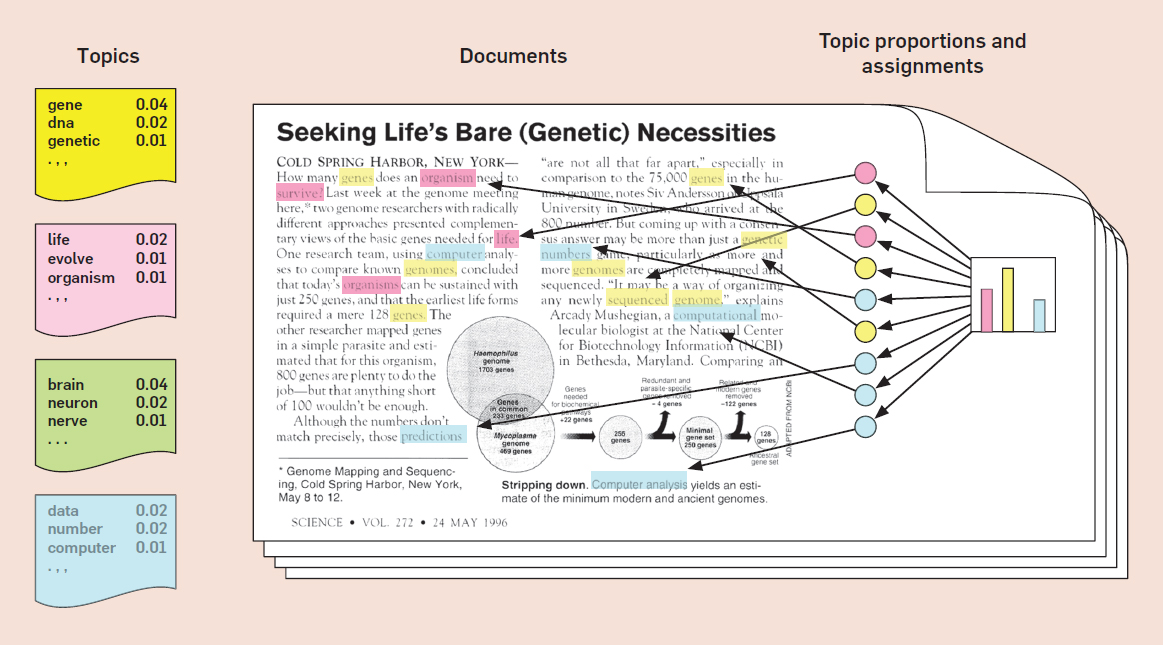

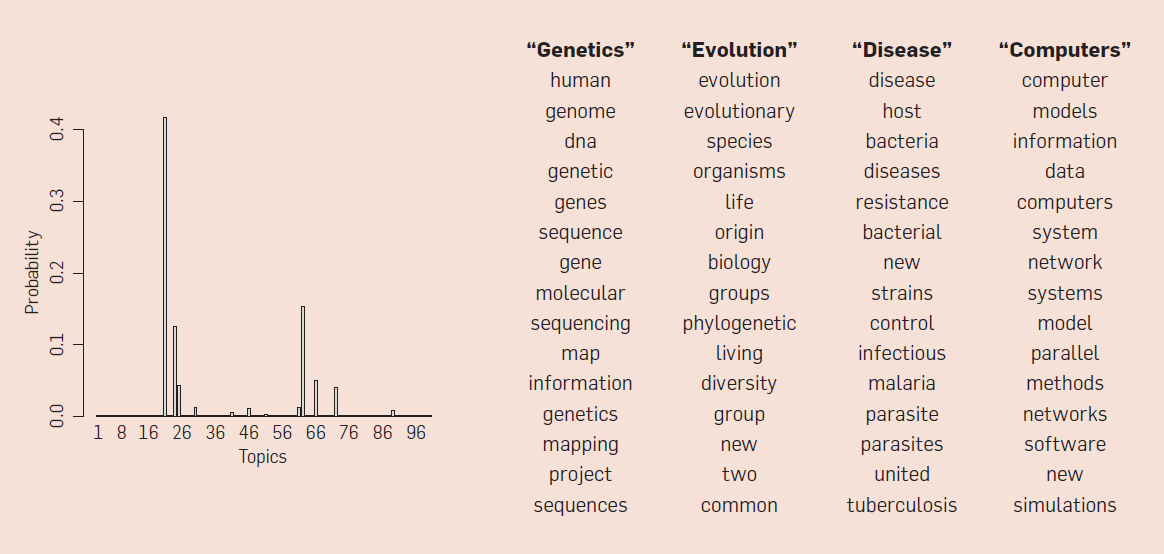

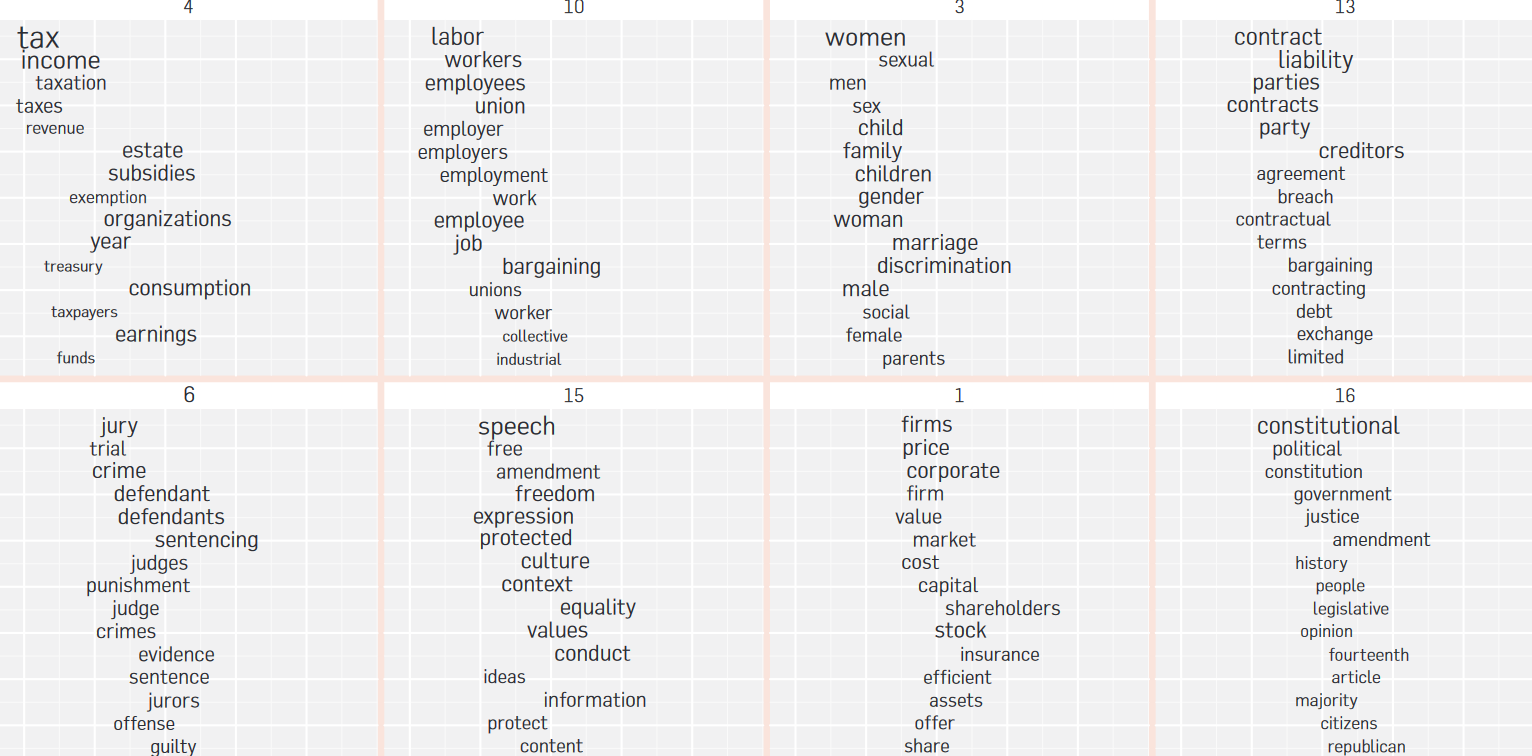

### Formalmente hablando

- Sea $\beta_{1:K}$ el conjunto de $K$ tópicos que se busca descubrir. Dónde $\beta_k$ representa una determinada distribución de las palabras del cuerpo de textos (o vocabulario) que se está modelando. 
- Sea $\theta_d$ la distribución de tópicos en el documento $d-$ésimo. Es decir $\theta_{d,k}$ será la probabilidad del tópico $k$ en el documento $d$.
- Sea $z_d$ el tópico asignado al documento $d$ y $z_{d,n}$ el tópico asignado a la $n-$ésima palabra del documento $d$. 
- Finalmente, sea $w_{d,n}$ la $n-$ésima palabra observada en el documento $d$, la cual es una palabra del vocabulario predefinido.
Con esta notación, el proceso generativo para LDA se puede describir de la manera siguiente:
$$ p(\beta_{1:K},\theta_{1:D},z_{1:D},w_{1:D}) = \prod_{i=1}^K p(\beta_i) \prod_{d=1}^D p(\theta_d)\left(\prod_{n=1}^N p(z_{d,n} \mid \theta_d) p(w_{d,n}\mid \beta_{1:K},z_{d,n})\right)$$
dónde $$\theta_d \sim Dirichlet(\alpha_{1:K})  \qquad \beta_{1:K} \sim Dirichlet(\eta_{1:V})$$
    y $$z_{d,n} \mid \theta_d \sim Multinomial(\theta_d) \qquad  w_{d,n} \mid z_{d,n},\beta_{1:K} \sim Multinomial(\beta_{z_{d,n}})$$
    
  

De manera gráfica, el proceso generativo se representa como: 

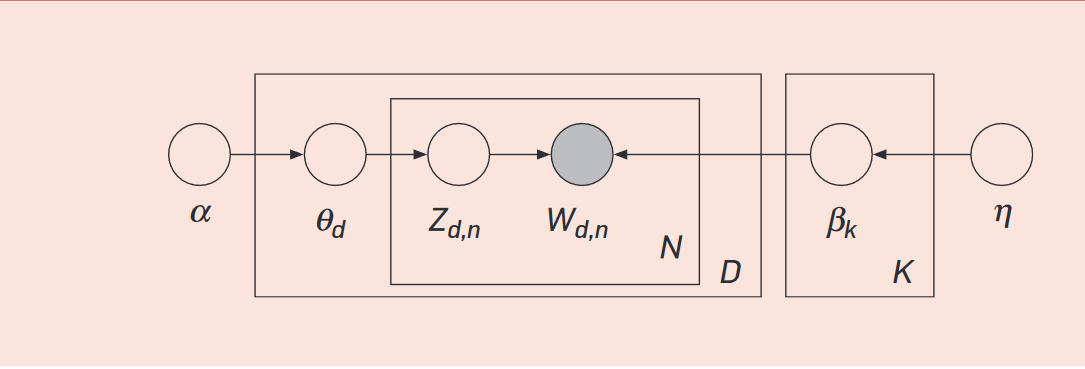

### Cálculo de la distribución a posteriori
Para descubrir la estructura oculta del modelo, se debe calcular la distribución a posteriori de los parámetros del modelo, esto es:

$$p(\beta_{1:K},\theta_{1:D},z_{1:D}\mid w_{1:D}) = \frac{p(\beta_{1:K},\theta_{1:D},z_{1:D},w_{1:D})}{p(w_{1:D})}$$

por la propiedad de natural conjugada de la distribución de Dirichlet con respecto a la distribución Multinomial, el numerador de esta expresión es fácilmente calculable. No es el caso del denominador, que considera todas las posibles estructuras de tópicos, lo que crece exponencialmente con el número de tópicos, tamaño del vocabulario y número de documentos.

Se consideran dos formas de aproximar la distribución a posteriori:




#### i) mediante técnicas de muestreo
que se basan en construir una cadena de Markov, cuya distribución en el equilibrio es la distribución a posteriori. De esta forma, se obtiene una muestra de la cadena de markov, que se asume (en el equilibrio) proviene de la distribución buscada. El caso mas conocido es Gibbs Sampling.

#### ii) mediante calculo variacional
que considera una familia de distribuciones parametrizadas que se acercan a la   la distribución a posteriori, y el problema a resolver, es encontrar los parámetros que minimizan la distancia a la distribución buscada.

### Trabajos de la Unidad
1. Revisar notebook de jupyter "INFO343-Actividades Modelo de Tópicos.ipynb", ejecutarlo y contestar las preguntas formuladas. 
2. Escoger un set de datos de <a href=  "https://drive.google.com/drive/folders/1rc_wTBvm2YLMPO4GK3mM2vjuEXlPN1JN?usp=sharing"> Carpeta en drive </a> y realizar lo siguiente:

i) Depurar los textos para conformar un set de documentos, en que cada noticia es un documento distinto.

ii) Realizar análisis de tópicos ${\bf comparando}$ los dos algoritmos de estimación presentados. Para ello trabaje inicialmente con una fracción de sus datos y luego con el set completo.

iii) Interprete sus resultados y concluya.
